In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.api import qqplot, add_constant
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from statsmodels.api import qqplot
import matplotlib as mpl
import statsmodels.api as sm
import pydotplus

import scipy.stats

In [2]:
df_raw = pd.read_csv("Car.csv", encoding = 'euc-kr')
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
print("Raw Data :" ,df_raw.shape)

Raw Data : (7253, 13)


In [4]:
df_raw['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

## step 1. Data Processing

#### - 단위와 같이 포현되어 있는 수치형 변수 처리

In [5]:
# 단위와 표현되어 있는 수치형 변수 처리
df_raw['Mileage'] = df_raw['Mileage'].str.replace('kmpl', '')

# 이거 왜 하는지 모르겟음 
#df_raw['Mileage'] = df_raw['Mileage'].str.replace('kmpl', '')
df_raw['Engine'] = df_raw['Engine'].str.replace('CC', '')
df_raw['Power'] = df_raw['Power'].str.replace('bhp', '')

In [6]:
df_raw['Mileage'] = df_raw['Mileage'].str.replace('null', '0')
df_raw['Engine'] = df_raw['Engine'].str.replace('null', '0')
df_raw['Power'] = df_raw['Power'].str.replace('null', '0')

In [7]:
# New_Price 삭제
df_raw.drop(columns = ["New_Price"], inplace = True)

#### - Data Type  확인 및 변경

In [8]:
df_raw.dtypes

Name                  object
Location              object
Price                float64
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [9]:
# object data type을 category data type 으로 변경
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].astype('category')
df_raw['Transmission'] = df_raw['Transmission'].astype('category')
df_raw['Owner_Type'] = df_raw['Owner_Type'].astype('category')

In [10]:
# object data tyoe을 float data type 으로 변경
df_raw['Mileage'] = df_raw['Mileage'].astype('float')
df_raw['Engine'] = df_raw['Engine'].astype('float')
df_raw['Power'] = df_raw['Power'].astype('float')

In [11]:
# data type 재확인
df_raw.dtypes

Name                   object
Location               object
Price                 float64
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
dtype: object

#### - 결측치 확인 및 처리

In [12]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
dtype: int64

In [13]:
# data가 0인 data 처리
df_raw.loc[df_raw.Mileage == 0, 'Mileage'] = np.nan
df_raw.loc[df_raw.Engine == 0, 'Engine'] = np.nan
df_raw.loc[df_raw.Power == 0, 'Power'] = np.nan


In [14]:
# 결측치에 대해 평균값으로 대체 처리
df_raw['Mileage'] = df_raw['Mileage'].fillna(df_raw['Mileage'].mean())
df_raw['Engine'] = df_raw['Engine'].fillna(df_raw['Engine'].mean())
df_raw['Power'] = df_raw['Power'].fillna(df_raw['Power'].mean())
df_raw['Seats'] = df_raw['Seats'].fillna(df_raw['Seats'].mean())

In [15]:
# Price 결측치 제거 : Brand, 자동차 제원치가 다양하여 제거 결정
df_raw.dropna(inplace = True)

In [16]:
# Check Name column uniques
df_raw['Name'].nunique()

1921

In [17]:
df_raw.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [18]:
df_raw['Name']

0                   Maruti Wagon R LXI CNG
1         Hyundai Creta 1.6 CRDi SX Option
2                             Honda Jazz V
3                        Maruti Ertiga VDI
4          Audi A4 New 2.0 TDI Multitronic
                       ...                
7228    Tata Tiago 1.05 Revotorq XT Option
7231     Ford EcoSport 1.5 Petrol Ambiente
7232                Jeep Compass 1.4 Sport
7235              Maruti Vitara Brezza ZDi
7236          Hyundai Elite i20 Magna Plus
Name: Name, Length: 6200, dtype: object

In [19]:
# 'Name'변수에서 Brand 명 추출(파생변수 생성), 'Name'변수 제거
df_raw['Brand'] = df_raw['Name'].apply(lambda x : x.split()[0])

In [20]:
df_raw['Brand']

0        Maruti
1       Hyundai
2         Honda
3        Maruti
4          Audi
         ...   
7228       Tata
7231       Ford
7232       Jeep
7235     Maruti
7236    Hyundai
Name: Brand, Length: 6200, dtype: object

In [21]:
df_raw['Brand'].nunique()

30

In [22]:
df_raw.drop(columns=['Name'], inplace = True)

In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6200 non-null   object  
 1   Price              6200 non-null   float64 
 2   Year               6200 non-null   int64   
 3   Kilometers_Driven  6200 non-null   int64   
 4   Fuel_Type          6200 non-null   category
 5   Transmission       6200 non-null   category
 6   Owner_Type         6200 non-null   category
 7   Mileage            6200 non-null   float64 
 8   Engine             6200 non-null   float64 
 9   Power              6200 non-null   float64 
 10  Seats              6200 non-null   float64 
 11  Brand              6200 non-null   object  
dtypes: category(3), float64(5), int64(2), object(2)
memory usage: 503.1+ KB


In [24]:
# df_raw['Price'] = df_raw['Price'].fillna(df_raw['Price'].median())

In [25]:
df_raw.isnull().sum()

Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
dtype: int64

In [26]:
# Car_age 변수 파생 : 현재 연도와 나이 열을 새로 생성, 현재 연도는 2023년이고 
# 연령 열은 자동차 나이= 현재연도 - 
df_raw['Current_year'] = 2023
df_raw['Car_age'] = df_raw['Current_year'] - df_raw['Year']
df_raw.drop(columns = ['Current_year'], axis = 1, inplace = True)
df_raw.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Car_age
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,13
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,8
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,12
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,11
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,10


#### - 이상치 제거

In [27]:
df_raw.describe()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age
count,6200.000000,6200.000000,6.200000e+03,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000
mean,14912.514750,2013.434194,5.815738e+04,18.384720,1619.983814,113.300417,5.278508,9.565806
std,17674.318464,3.271969,9.010627e+04,4.156986,599.744181,53.540989,0.805628,3.271969
min,7.080000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,0.000000,4.000000
25%,5365.360000,2012.000000,3.300000e+04,15.400000,1198.000000,77.750000,5.000000,7.000000
50%,8814.520000,2014.000000,5.251450e+04,18.346527,1493.000000,98.600000,5.000000,9.000000
75%,15869.972500,2016.000000,7.227750e+04,21.100000,1968.000000,138.030000,5.000000,11.000000
max,245273.600000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,25.000000


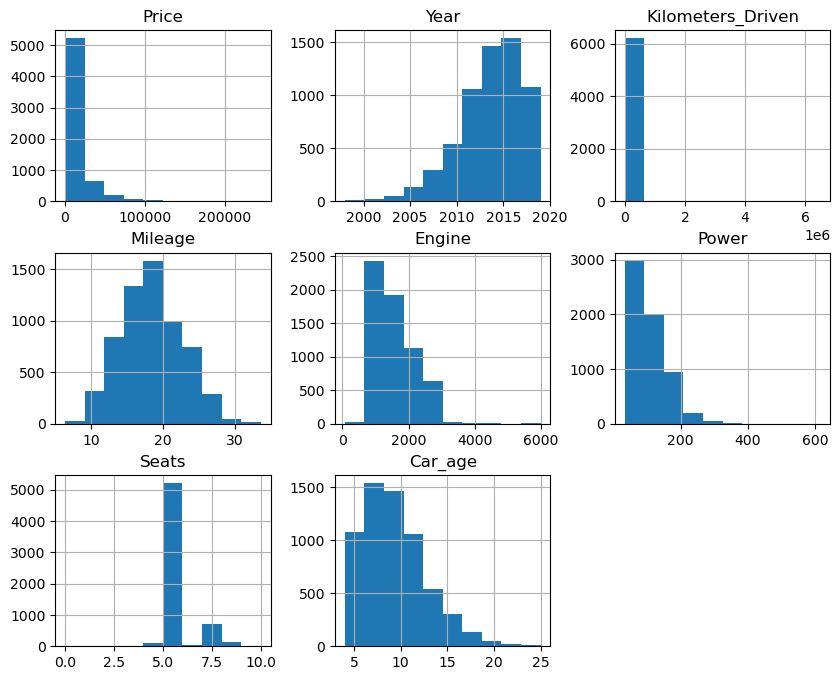

In [28]:
df_raw.hist(figsize = (10, 8))
plt.show()

- Price 는 2.45억원으로 중고차로는 너무 높으며, 특이치로 보임

- Year 는 1998 - 2019년까지이며, Car_age 는 4년차부터 25년까지임

- Kilometers_Driven 은 171km~6,500,000km, 평균은 58,157이고, 300km 이상은 특이치로 보임

- Mileage는 거의 정상적으로 분포를 보임

- Engine 은 오른쪽으로 치우져 있고 상단과 하단에 특이차가 있음

- Price, Power, Car_age는 왼쪽으로 치우쳐져 있음

In [29]:
# 목표변수(Price) 이상치 확인

<Axes: >

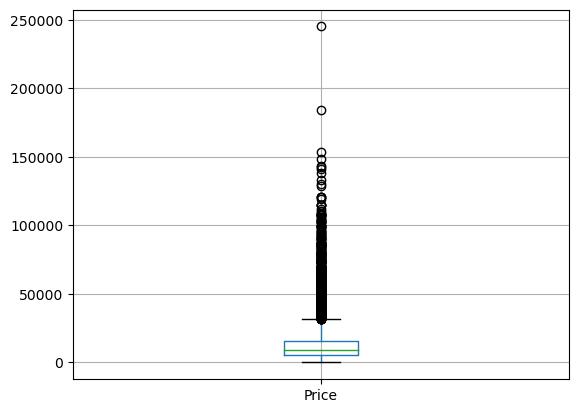

In [30]:
# Price 분포 확인
df_raw.boxplot('Price')

- price 이상치 존재

In [31]:
# Price 가 1.8억원 이상이면 제외 (중고차로는 너무 비싸다)
df_raw = df_raw[df_raw['Price'] < 180000]
df_raw.reset_index(drop=True, inplace=True)
df_raw.head(3)

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Car_age
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,13
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,8
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,12


<Axes: >

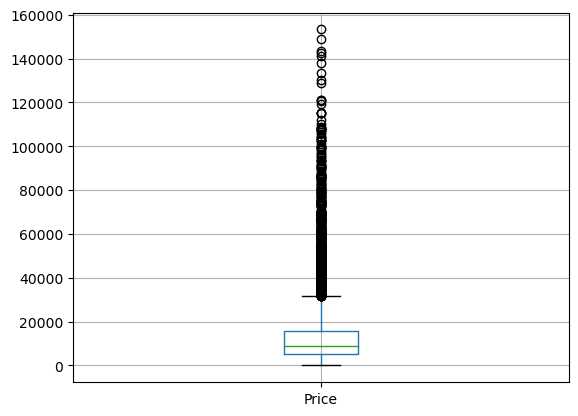

In [32]:
df_raw.boxplot('Price')

/tmp/ipykernel_7793/1411932397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw['Price'])


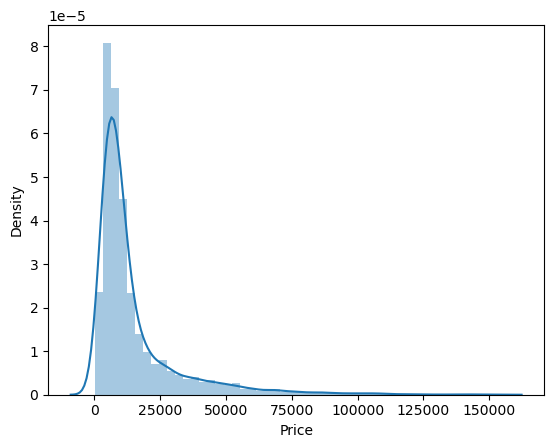

In [33]:
sns.distplot(df_raw['Price'])
plt.show(sns)

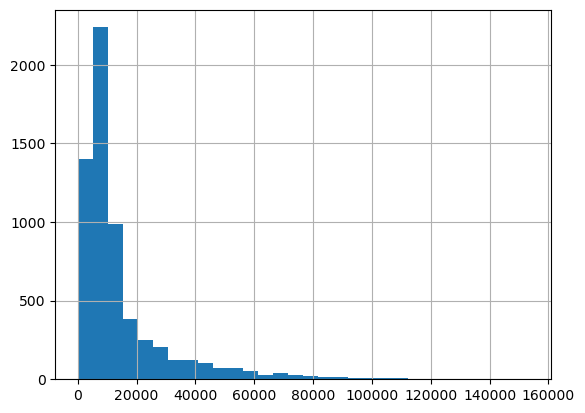

In [34]:
df_raw['Price'].hist(bins = 30)
plt.show()

- Price가 왼쪽으로 기울어져 있음

<Axes: >

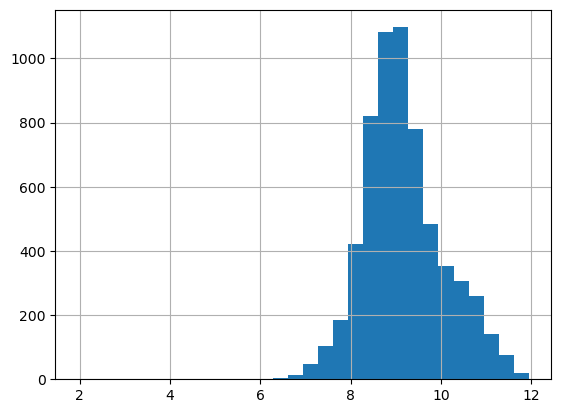

In [35]:
# Price log 변환 및 정규성 확인
df_raw['Price'] = np.log(df_raw['Price'])
df_raw['Price'].hist(bins = 30)

In [36]:
# 정규성 검정 : Anderson
df_norm = scipy.stats.anderson(df_raw['Price'], dist='norm')
print(df_norm)

AndersonResult(statistic=42.48217946060868, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.178241601732568, scale=0.8837743480270074)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


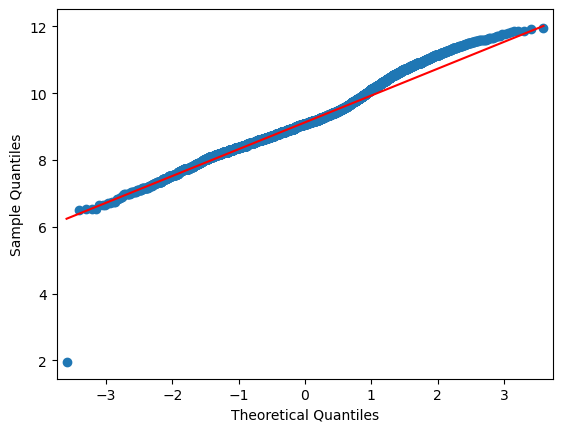

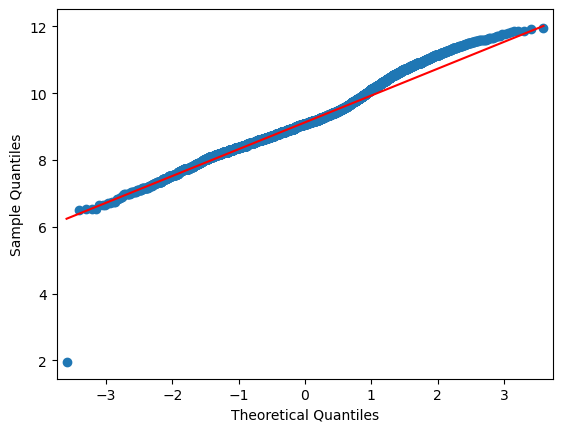

In [37]:
# 잔차 정규성 검정 : QQplot, s-standardized line
# r-regressionline, q-quartiles
qqplot(df_raw['Price'], line = 'q')

=> Price 정규성 만족

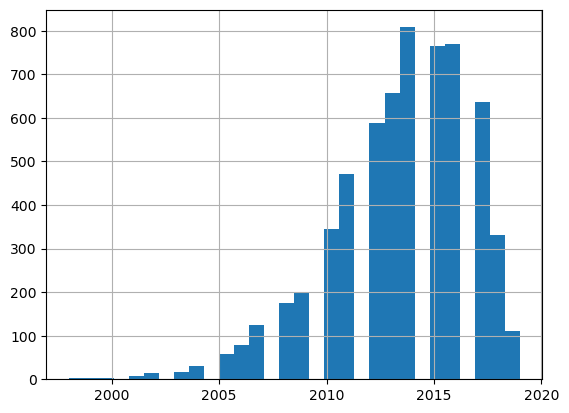

In [38]:
# 설명변수 중 이상치 확인 및 처리

# year 분포 확인
df_raw['Year'].hist(bins=30)
plt.show()

<Axes: >

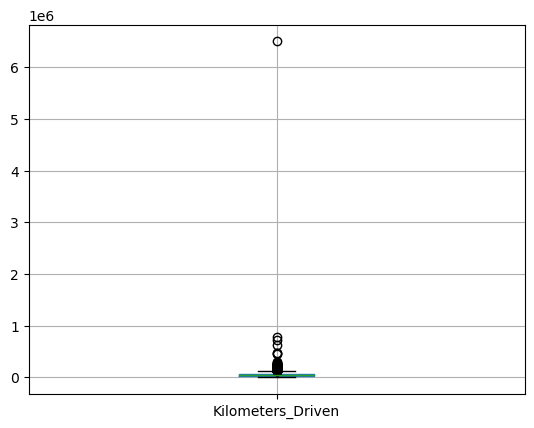

In [39]:
# kilometers_Driven 분포 확인
df_raw.boxplot('Kilometers_Driven')

 Kilometers_Driven 이상치 존재

<Axes: >

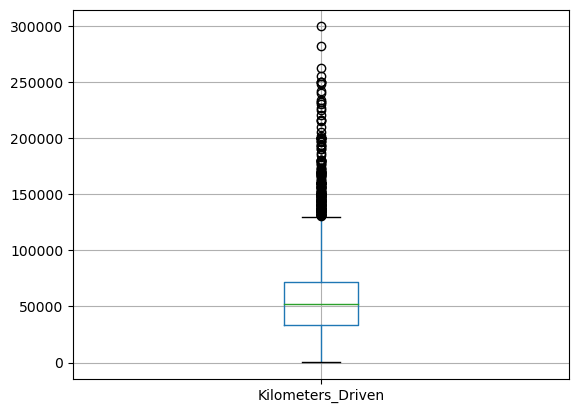

In [40]:
# Kilometers_Driven 변수가 100만 이상 제외
df_raw = df_raw[df_raw['Kilometers_Driven'] < 300000]
df_raw.reset_index(drop=True, inplace=True)
df_raw.boxplot("Kilometers_Driven")

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

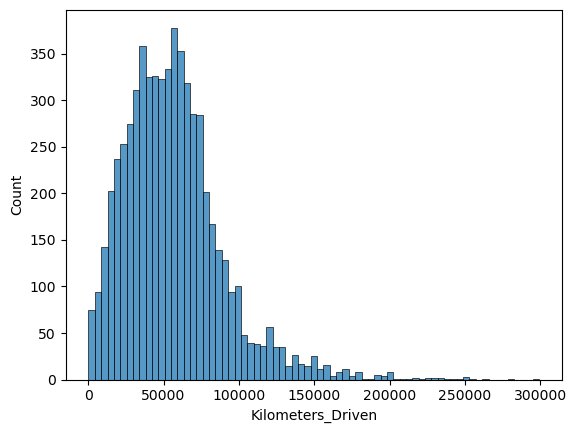

In [41]:
# Kilometers_Driven 분포 확인
sns.histplot(df_raw, x = "Kilometers_Driven")

<Axes: xlabel='Mileage', ylabel='Count'>

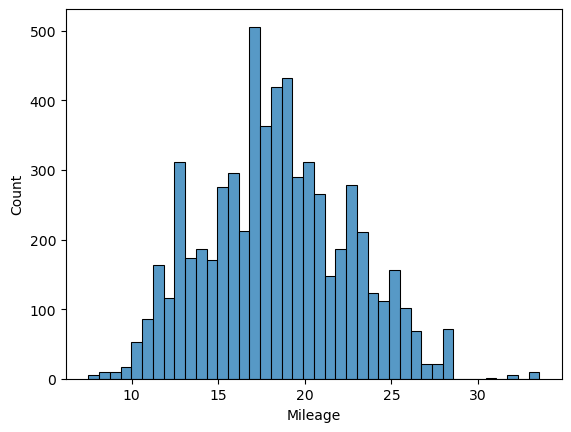

In [42]:
# Mileage 분포 확인
sns.histplot(df_raw, x = "Mileage")

<Axes: xlabel='Engine', ylabel='Count'>

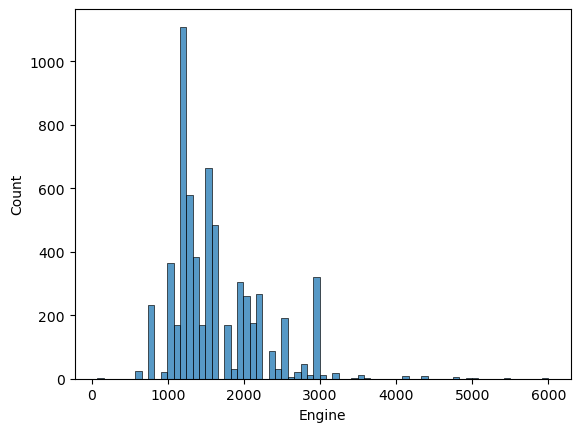

In [43]:
# Engine 성능 분포 확인
sns.histplot(df_raw, x = "Engine")

<Axes: xlabel='Power', ylabel='Count'>

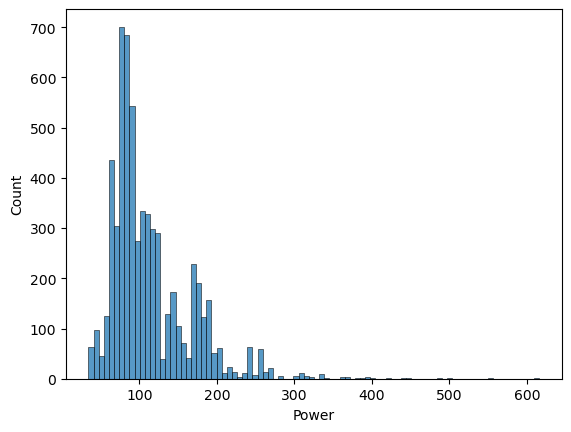

In [44]:
# Power 성능 분포 확인
sns.histplot(df_raw, x = "Power")

=> Power에 이상치 존재

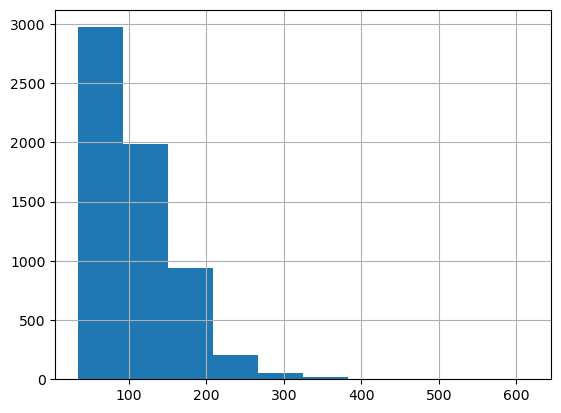

In [45]:
df_raw['Power'].hist()
plt.show()

<Axes: >

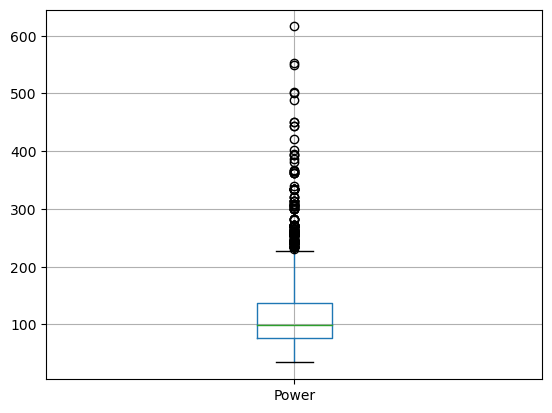

In [46]:
df_raw.boxplot('Power')

<Axes: >

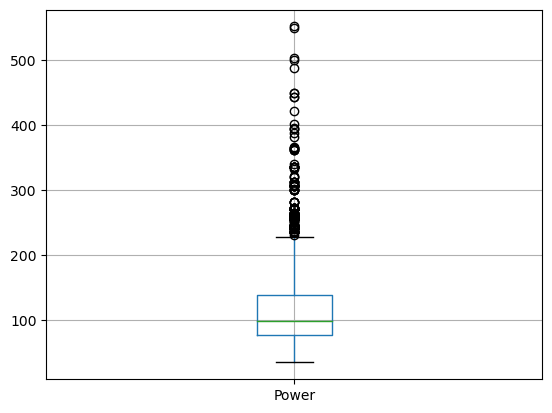

In [47]:
# Power 변수 1600 이상 제외
df_raw = df_raw[df_raw['Power'] < 600]
df_raw.reset_index(drop=True, inplace=True)
df_raw.boxplot('Power')

<Axes: >

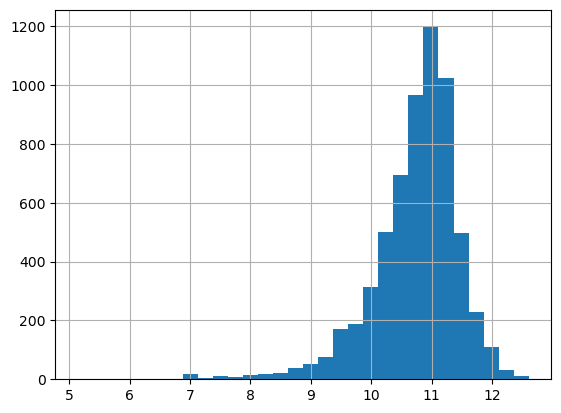

In [48]:
df_raw['Kilometers_Driven'] = np.log(df_raw['Kilometers_Driven'])
df_raw['Kilometers_Driven'].hist(bins = 30) 

<Axes: >

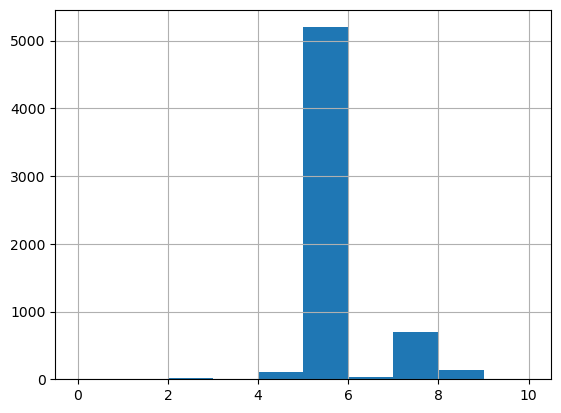

In [49]:
# Seats 분포 확인
df_raw['Seats'].hist()

<Axes: >

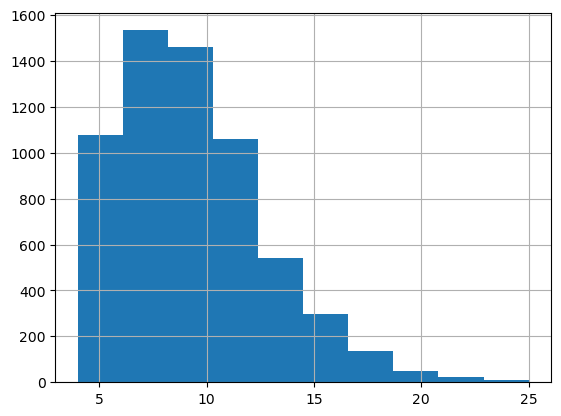

In [50]:
# Car_age 분포 확인
df_raw['Car_age'].hist()

In [51]:
df_raw["Brand"].value_counts()

Maruti           1254
Hyundai          1126
Honda             621
Toyota            423
Mercedes-Benz     325
Volkswagen        319
Ford              304
Mahindra          282
BMW               272
Audi              241
Tata              194
Skoda             181
Renault           151
Chevrolet         121
Nissan             95
Land               59
Jaguar             43
Mitsubishi         34
Fiat               31
Mini               29
Volvo              21
Jeep               19
Porsche            18
Datsun             17
ISUZU               3
Force               3
Smart               1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

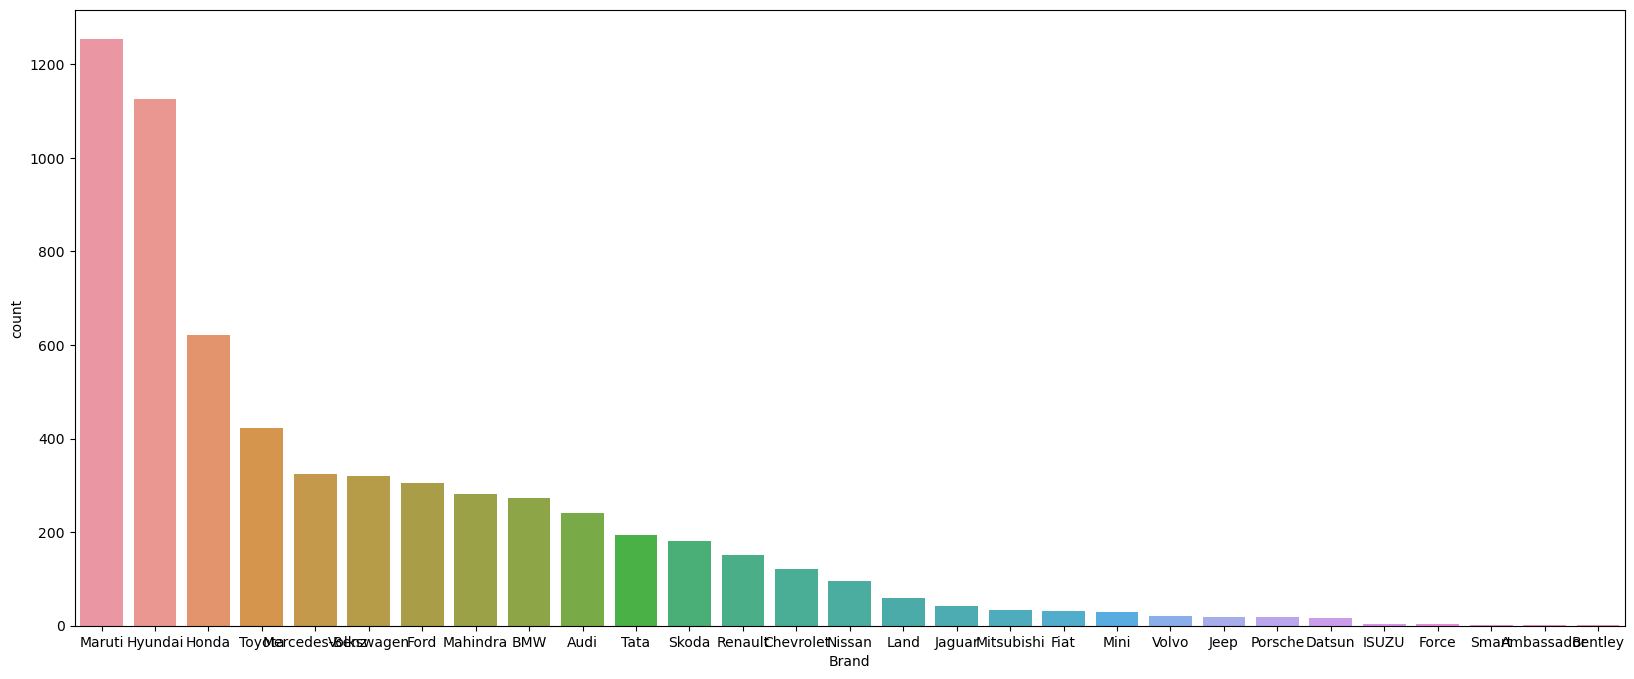

In [52]:
plt.figure(figsize = (20,8))
sns.countplot(x="Brand", data = df_raw, order = df_raw["Brand"].value_counts().index)
plt.show()

In [53]:
df_raw["Location"].value_counts()

Mumbai        817
Hyderabad     758
Kochi         676
Coimbatore    664
Pune          632
Delhi         571
Kolkata       550
Chennai       502
Jaipur        423
Bangalore     363
Ahmedabad     233
Name: Location, dtype: int64

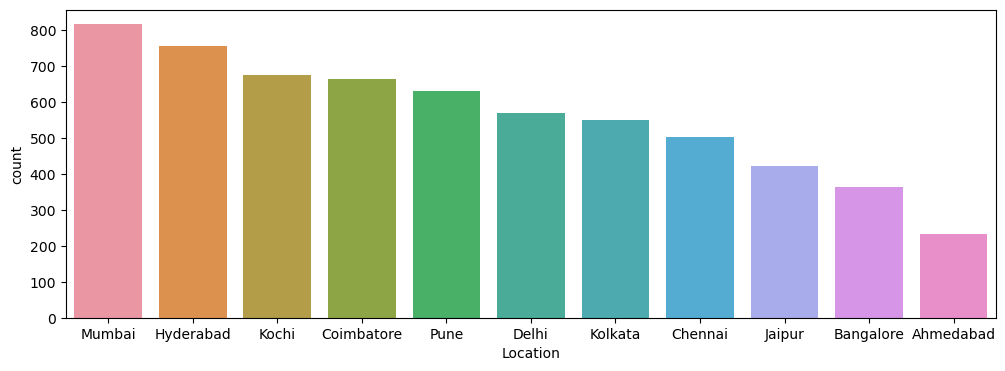

In [54]:
plt.figure(figsize = (12,4))
sns.countplot(x="Location", data = df_raw, order = df_raw["Location"].value_counts().index)
plt.show()

In [55]:
df_raw["Fuel_Type"].value_counts()

Diesel      3295
Petrol      2825
CNG           57
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

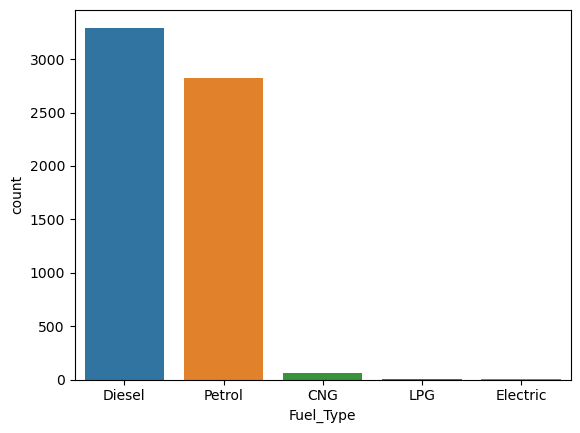

In [56]:
sns.countplot(x="Fuel_Type", data = df_raw, order = df_raw["Fuel_Type"].value_counts().index)
plt.show()

In [57]:
df_raw["Transmission"].value_counts()

Manual       4411
Automatic    1778
Name: Transmission, dtype: int64

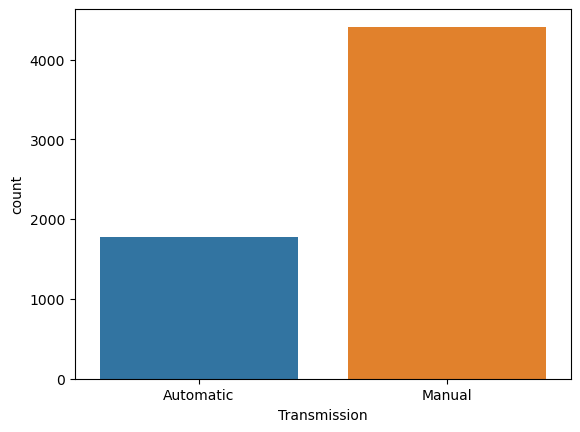

In [58]:
sns.countplot(x="Transmission", data = df_raw)
plt.show()

In [59]:
df_raw["Owner_Type"].value_counts()

First             5086
Second             982
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

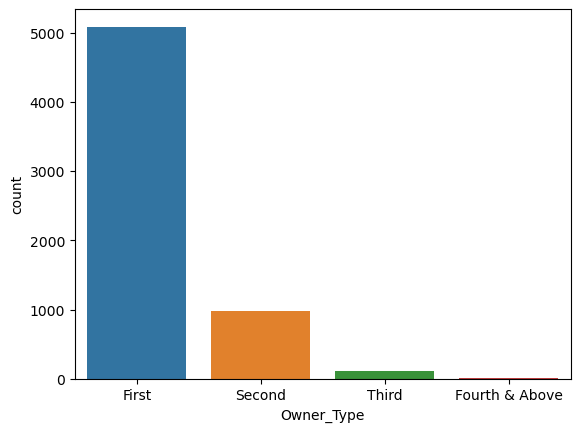

In [60]:
sns.countplot(x="Owner_Type", data = df_raw, order = df_raw["Owner_Type"].value_counts().index)
plt.show()

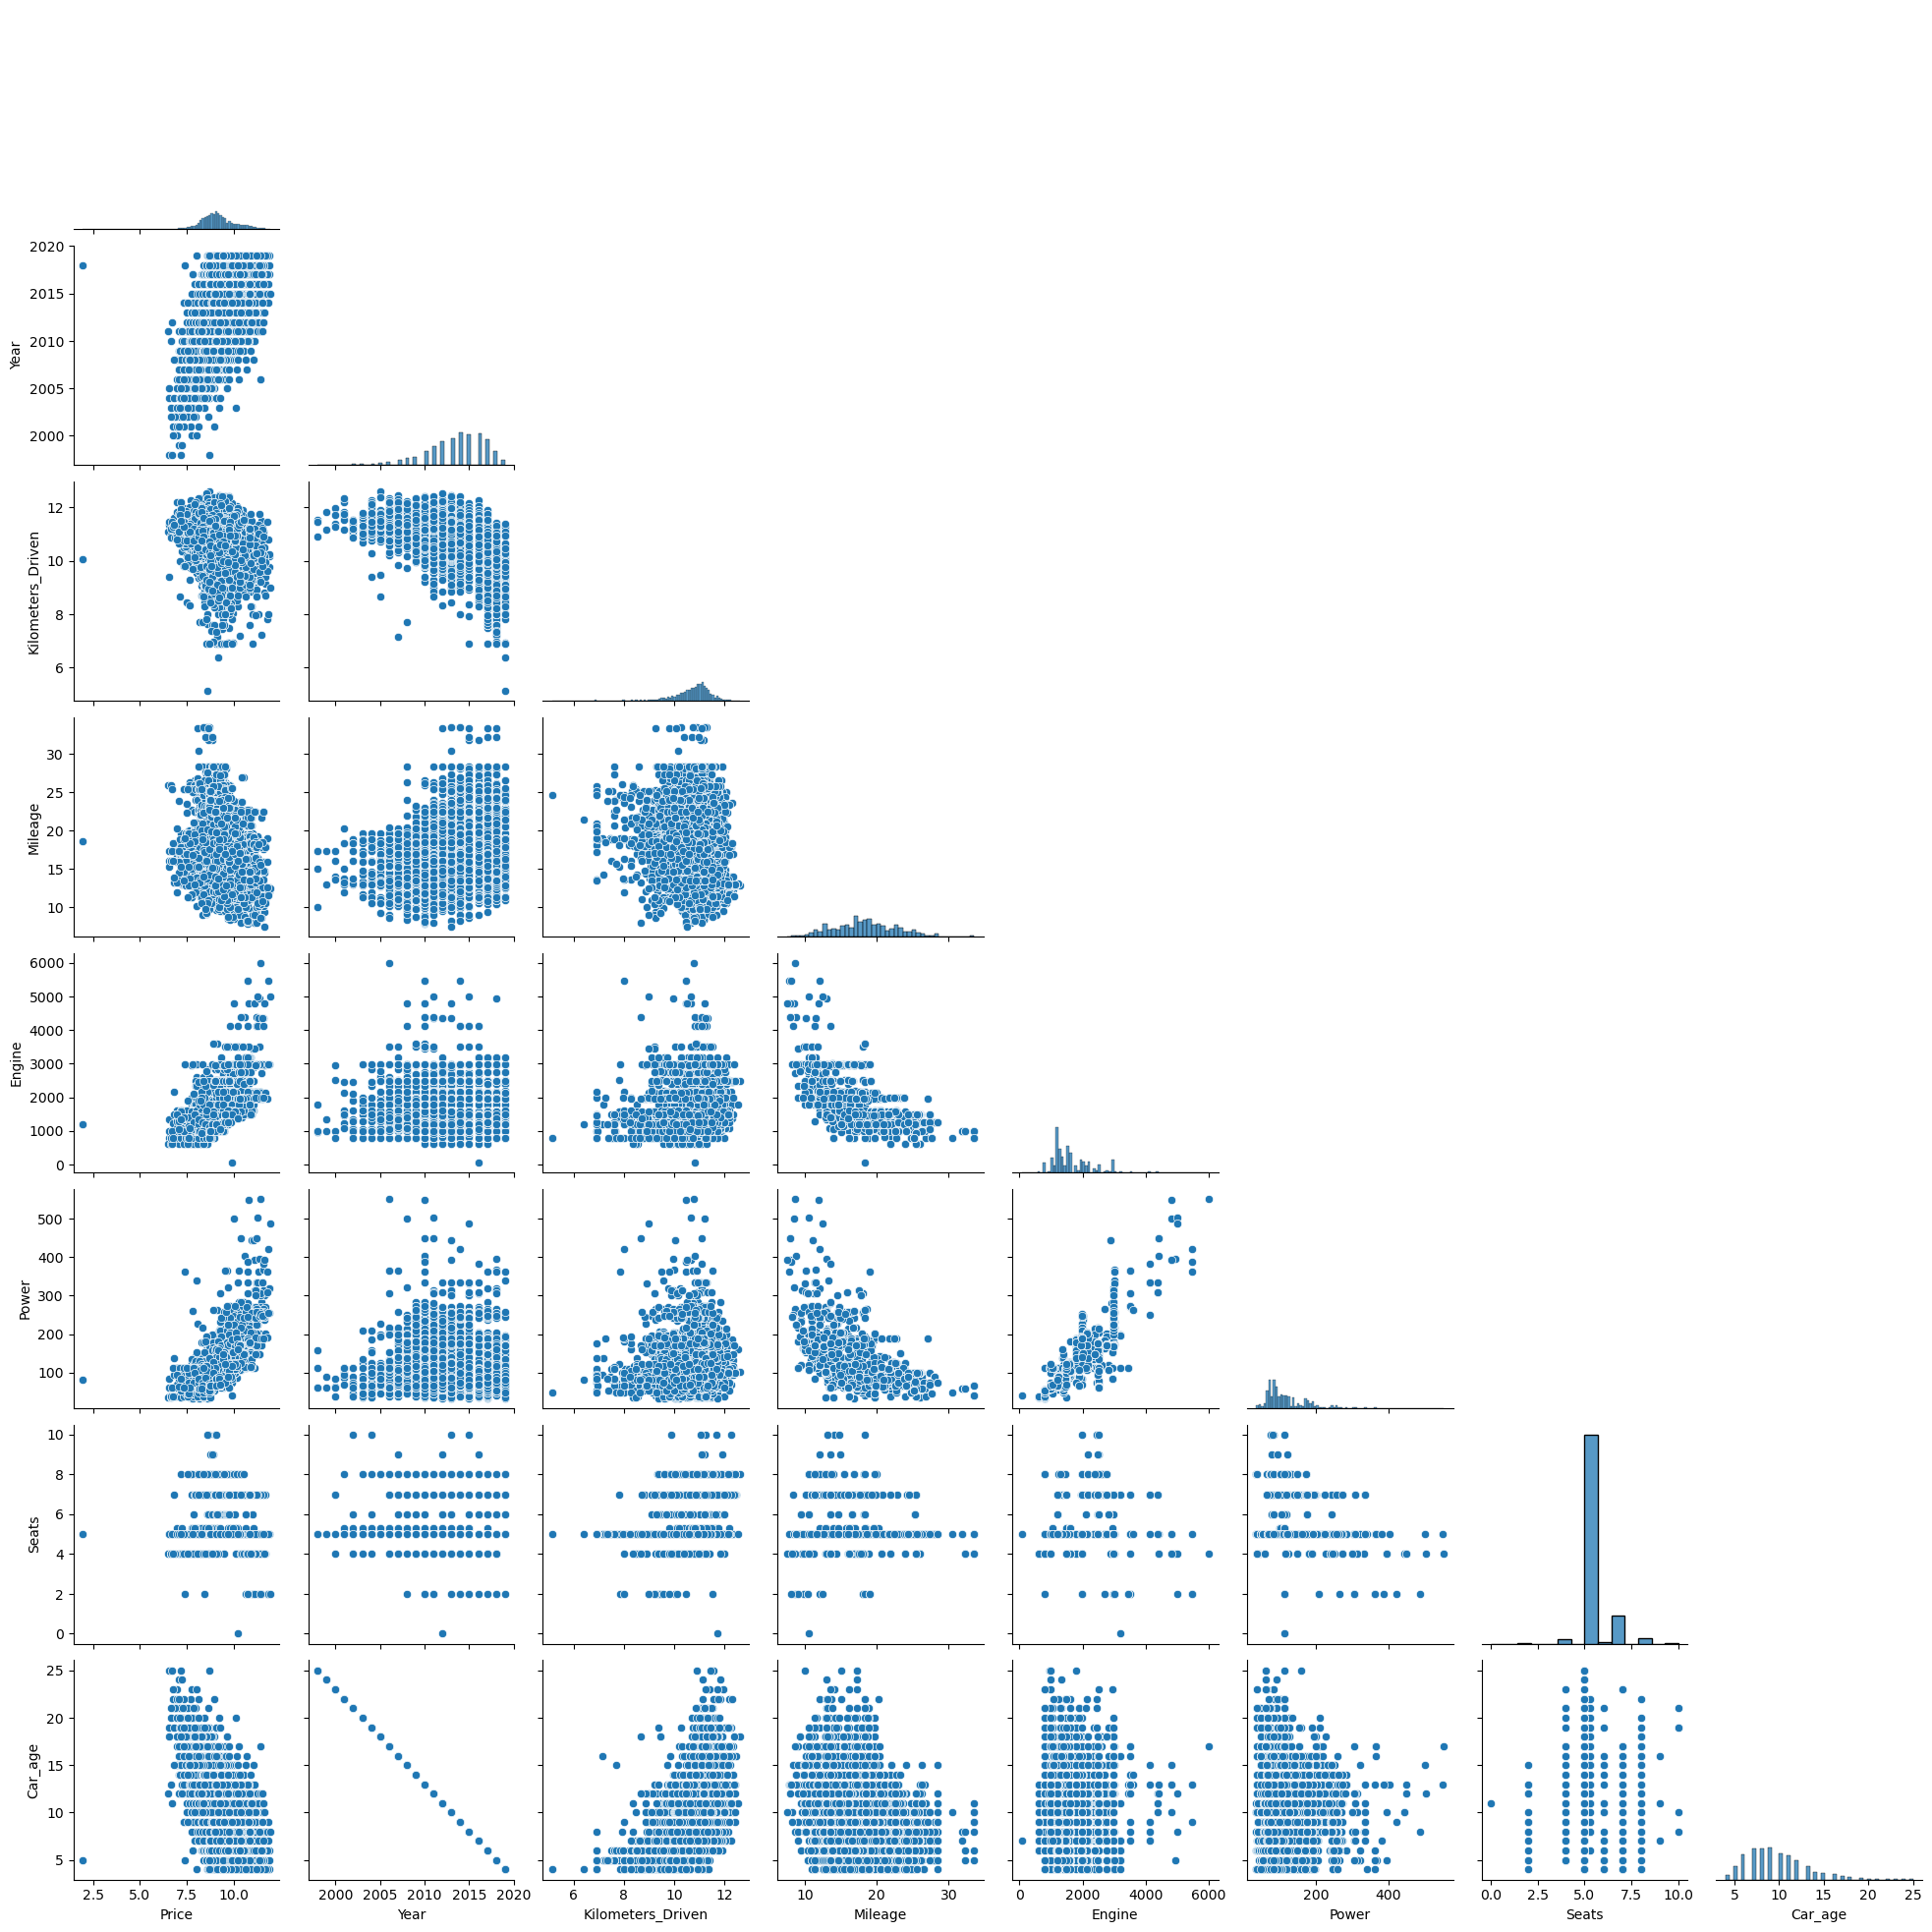

In [61]:
sns.pairplot(data = df_raw, corner = True)
plt.show()

In [62]:
df_raw.corr()

/tmp/ipykernel_7793/1768766406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.corr()


,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age
Price,1.000000,0.499524,-0.204782,-0.290326,0.669464,0.738620,0.166187,-0.499524
Year,0.499524,1.000000,-0.509348,0.291857,-0.053979,0.013662,0.010419,-1.000000
Kilometers_Driven,-0.204782,-0.509348,1.000000,-0.136581,0.152885,0.019314,0.190809,0.509348
Mileage,-0.290326,0.291857,-0.136581,1.000000,-0.640539,-0.548556,-0.347686,-0.291857
Engine,0.669464,-0.053979,0.152885,-0.640539,1.000000,0.856269,0.400717,0.053979
Power,0.738620,0.013662,0.019314,-0.548556,0.856269,1.000000,0.105531,-0.013662
Seats,0.166187,0.010419,0.190809,-0.347686,0.400717,0.105531,1.000000,-0.010419
Car_age,-0.499524,-1.000000,0.509348,-0.291857,0.053979,-0.013662,-0.010419,1.000000


/tmp/ipykernel_7793/2118569981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_raw.corr(),annot= True, cmap= "coolwarm")


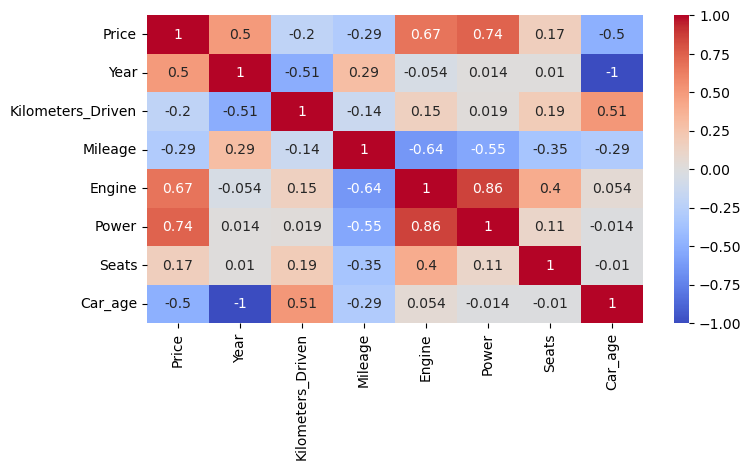

In [63]:
plt.figure(figsize = (8,4))
sns.heatmap(df_raw.corr(),annot= True, cmap= "coolwarm")
plt.show()

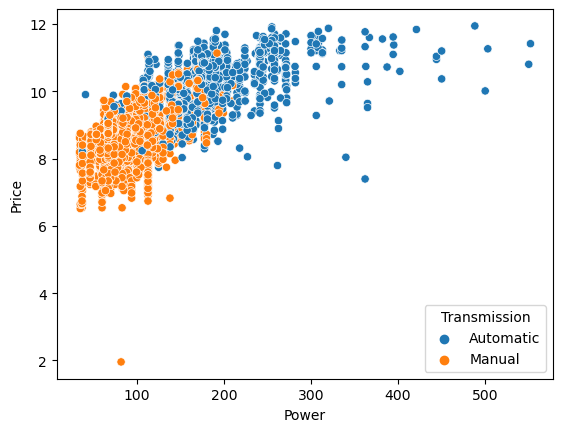

In [64]:
sns.scatterplot(x="Power",y="Price", hue = "Transmission",data= df_raw)
plt.show()

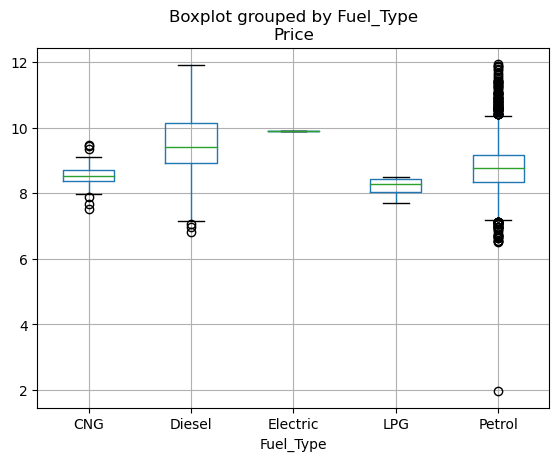

In [65]:
df_raw.boxplot(column = "Price", by = "Fuel_Type")
plt.show()

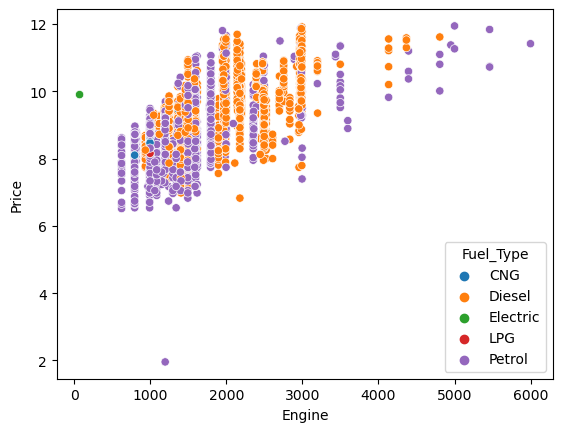

In [66]:
sns.scatterplot(x="Engine",y="Price", hue = "Fuel_Type",data= df_raw)
plt.show()

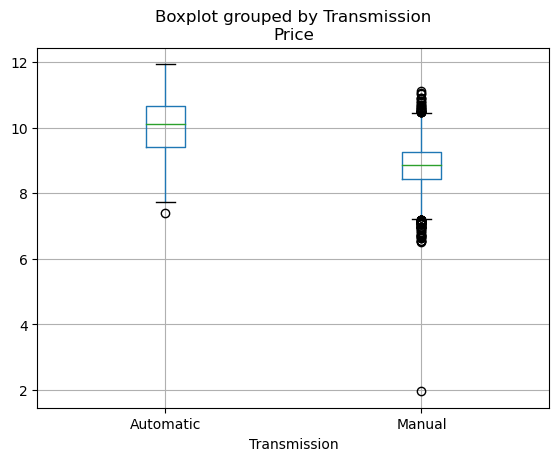

In [67]:
df_raw.boxplot(column = "Price", by = "Transmission")
plt.show()

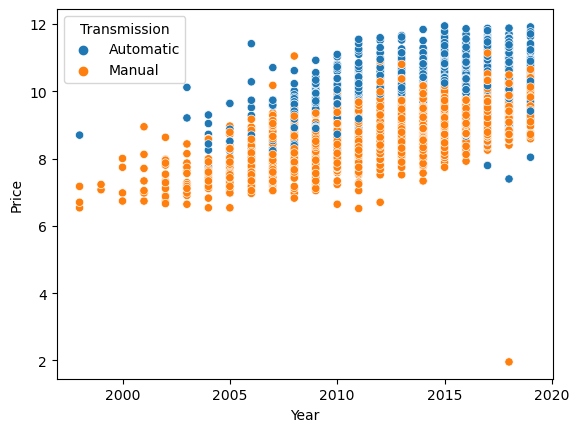

In [68]:
sns.scatterplot(x="Year",y="Price", hue = "Transmission",data= df_raw)
plt.show()

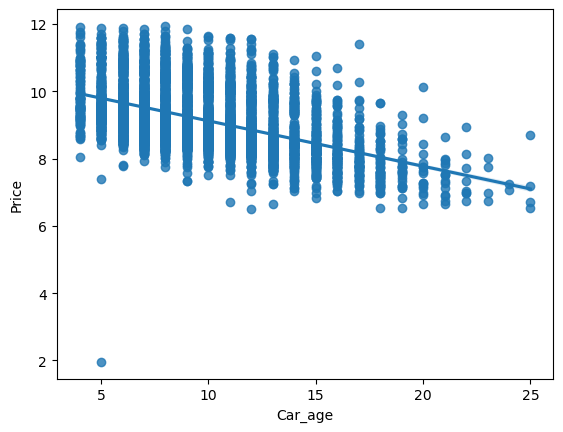

In [69]:
sns.regplot(x = "Car_age", y = "Price", data = df_raw)
plt.show()

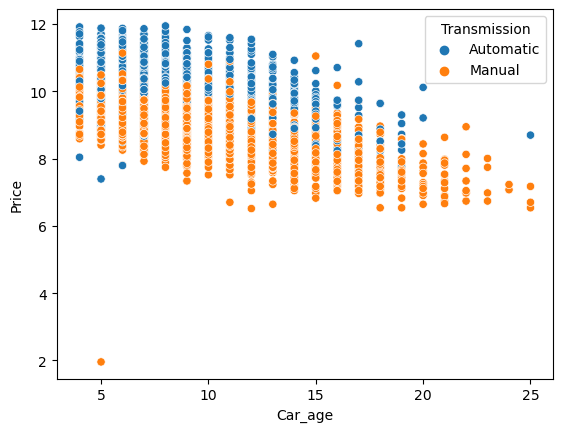

In [70]:
sns.scatterplot(x="Car_age",y="Price", hue = "Transmission",data= df_raw)
plt.show()

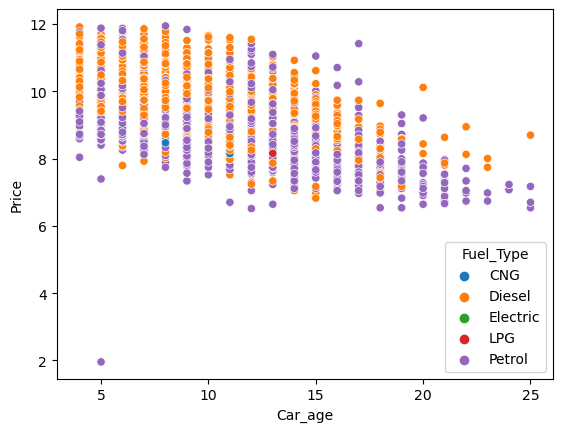

In [71]:
sns.scatterplot(x="Car_age",y="Price", hue = "Fuel_Type",data= df_raw)
plt.show()

<Axes: title={'center': 'the price of the year by the transmission'}, xlabel='Year', ylabel='Price'>

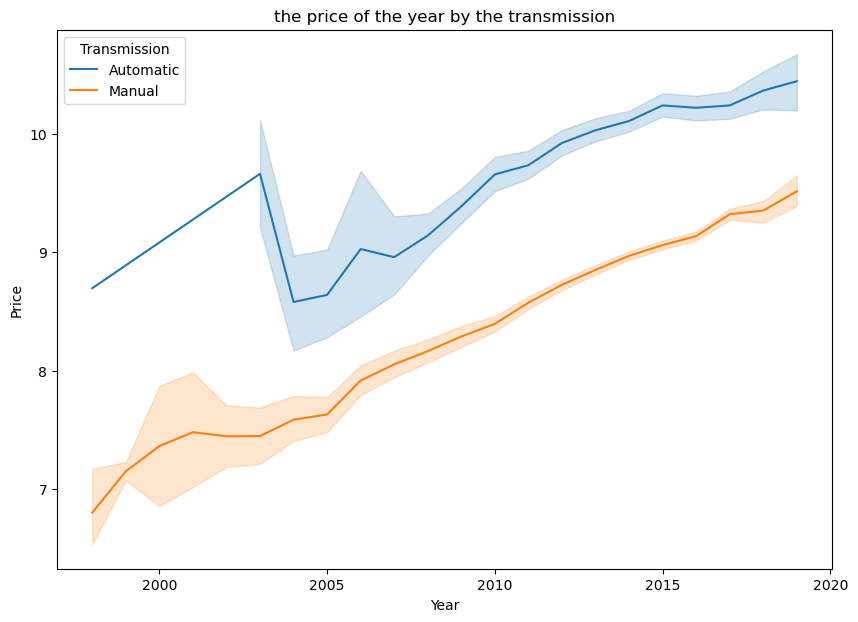

In [72]:
plt.figure(figsize=(10,7))
plt.title("the price of the year by the transmission")
sns.lineplot(x="Year",y="Price", hue = "Transmission",data= df_raw)


<Axes: title={'center': 'the price of the year by the Fuel_Type'}, xlabel='Year', ylabel='Price'>

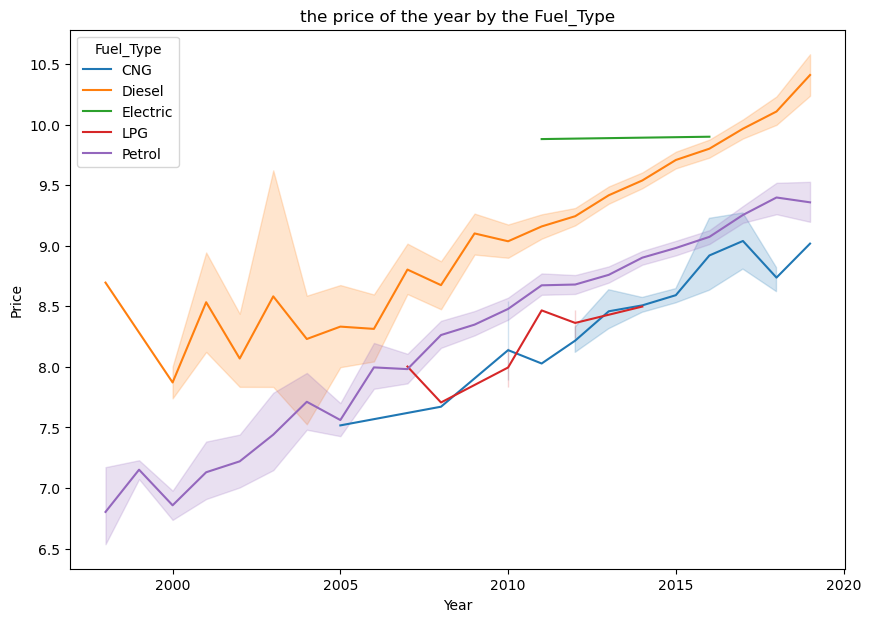

In [73]:
plt.figure(figsize=(10,7))
plt.title("the price of the year by the Fuel_Type")
sns.lineplot(x="Year",y="Price", hue = "Fuel_Type",data= df_raw)

<Axes: title={'center': 'the price of the year by the Owner_Type'}, xlabel='Year', ylabel='Price'>

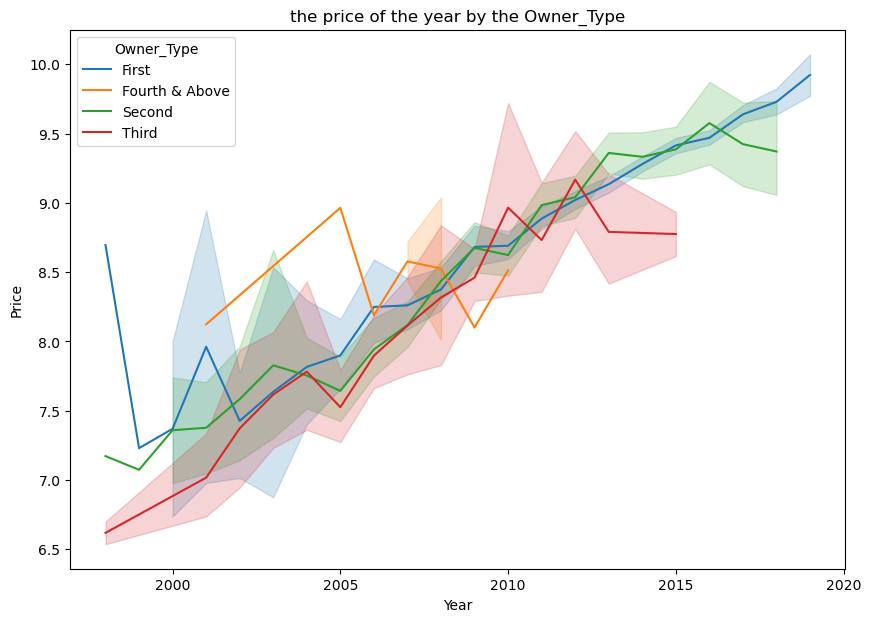

In [74]:
plt.figure(figsize=(10,7))
plt.title("the price of the year by the Owner_Type")
sns.lineplot(x="Year",y="Price", hue = "Owner_Type",data= df_raw)

In [75]:
from scipy import stats

import statsmodels.formula.api as smf

from statsmodels.stats.anova import anova_lm


In [76]:
formula = "Price ~ Transmission + Fuel_Type + Owner_Type + Location + Brand"

lm = smf.ols(formula, df_raw).fit()

print(anova_lm(lm))

                  df       sum_sq      mean_sq            F         PR(>F)
Transmission     1.0  1792.732897  1792.732897  7577.919895   0.000000e+00
Fuel_Type        4.0   587.447726   146.861931   620.788492   0.000000e+00
Owner_Type       3.0   158.736795    52.912265   223.661264  1.032511e-137
Location        10.0   211.553480    21.155348    89.424104  5.090816e-173
Brand           28.0   626.148505    22.362447    94.526535   0.000000e+00
Residual      6142.0  1453.032706     0.236573          NaN            NaN


In [77]:
df_raw.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Car_age
0,Mumbai,7.894572,2010,11.184421,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,13
1,Pune,9.860684,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,8
2,Chennai,8.839033,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,12
3,Chennai,9.126715,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,11
4,Coimbatore,10.210778,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,10


In [78]:
df_dummy = pd.get_dummies(df_raw[["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"]])
df_dummy.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_tot = pd.concat([df_raw, df_dummy], axis = 1)
df_tot = df_tot.drop(["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"], axis = 1)
df_tot

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age,Location_Ahmedabad,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,7.894572,2010,11.184421,26.60,998.0,58.16,5.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.860684,2015,10.621327,19.67,1582.0,126.20,5.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.839033,2011,10.736397,18.20,1199.0,88.70,5.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.126715,2012,11.373663,20.77,1248.0,88.76,7.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.210778,2013,10.613246,15.20,1968.0,140.80,5.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6184,9.289401,2016,10.631350,27.28,1047.0,69.00,5.0,7,0,0,...,0,0,0,0,0,0,1,0,0,0
6185,9.508571,2017,10.571701,17.00,1497.0,121.36,5.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
6186,10.234177,2018,8.699515,16.00,1368.0,160.00,5.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
6187,9.692976,2017,9.970211,24.30,1248.0,88.50,5.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


# STEP 4. 모델 생성 : Linear Regression

In [80]:
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

* 데이터 구성

In [81]:
df_tot.rename(columns = {df_tot.columns[-12]:'Brand_Benz',df_tot.columns[-32]:'Owner_FourthAbove'}, inplace = True)
df_tot.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age,Location_Ahmedabad,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,7.894572,2010,11.184421,26.60,998.0,58.16,5.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.860684,2015,10.621327,19.67,1582.0,126.20,5.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.839033,2011,10.736397,18.20,1199.0,88.70,5.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.126715,2012,11.373663,20.77,1248.0,88.76,7.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.210778,2013,10.613246,15.20,1968.0,140.80,5.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_train, df_test = train_test_split(df_tot, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (4332, 59)
test data size : (1857, 59)


In [83]:
df_train.head(2)

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age,Location_Ahmedabad,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
3651,8.816560,2016,11.572062,24.4,1120.0,71.00,5.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
744,10.491956,2014,11.002100,20.7,1496.0,113.98,5.0,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_train.columns

Index(['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Car_age', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_FourthAbove', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
  

* 회귀 모델 생성 : 설명변수 전체

In [85]:
formula = "Price ~ Year + Kilometers_Driven + Mileage + Engine + Power\
       + Seats + Car_age + Location_Ahmedabad + Location_Bangalore\
       + Location_Chennai + Location_Coimbatore + Location_Delhi\
       + Location_Hyderabad + Location_Jaipur + Location_Kochi\
       + Location_Kolkata + Location_Mumbai + Location_Pune + Fuel_Type_CNG\
       + Fuel_Type_Diesel + Fuel_Type_Electric + Fuel_Type_LPG\
       + Fuel_Type_Petrol + Transmission_Automatic + Transmission_Manual\
       + Owner_Type_First + Owner_FourthAbove + Owner_Type_Second\
       + Owner_Type_Third + Brand_Ambassador + Brand_Audi + Brand_BMW\
       + Brand_Bentley + Brand_Chevrolet + Brand_Datsun + Brand_Fiat\
       + Brand_Force + Brand_Ford + Brand_Honda + Brand_Hyundai\
       + Brand_ISUZU + Brand_Jaguar + Brand_Jeep + Brand_Land\
       + Brand_Mahindra + Brand_Maruti + Brand_Benz + Brand_Mini\
       + Brand_Mitsubishi + Brand_Nissan + Brand_Porsche + Brand_Renault\
       + Brand_Skoda + Brand_Smart + Brand_Tata + Brand_Toyota\
       + Brand_Volkswagen + Brand_Volvo"

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     848.1
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:14:26   Log-Likelihood:                -390.82
No. Observations:                4332   AIC:                             885.6
Df Residuals:                    4280   BIC:                             1217.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.46

In [86]:
df_train_y = df_train["Price"]
df_train_x = df_train.drop(columns=["Price"], axis=1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values(by='VIF',ascending=True).round(2)


/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,const,0.00
2,Kilometers_Driven,1.79
6,Seats,2.46
3,Mileage,3.85
5,Power,9.00
4,Engine,10.17
42,Brand_Jaguar,inf
41,Brand_ISUZU,inf
40,Brand_Hyundai,inf
39,Brand_Honda,inf


* 회귀 모델 생성 : 유의한 설명변수 확인

In [87]:
formula = "Price ~ Year + Kilometers_Driven + Mileage + Engine + Power\
       + Seats + Car_age + Location_Ahmedabad + Location_Bangalore\
       + Location_Chennai + Location_Coimbatore + Location_Delhi\
       + Location_Hyderabad + Location_Jaipur + Location_Kochi\
       + Location_Kolkata + Location_Mumbai + Location_Pune + Fuel_Type_CNG\
       + Fuel_Type_Diesel + Fuel_Type_Electric + Fuel_Type_LPG\
       + Fuel_Type_Petrol + Transmission_Automatic + Transmission_Manual\
       + Owner_Type_First + Owner_FourthAbove + Owner_Type_Second\
       + Owner_Type_Third + Brand_Ambassador + Brand_Audi + Brand_BMW\
       + Brand_Bentley + Brand_Chevrolet + Brand_Datsun + Brand_Fiat\
       + Brand_Force + Brand_Ford + Brand_Honda + Brand_Hyundai\
       + Brand_ISUZU + Brand_Jaguar + Brand_Jeep + Brand_Land\
       + Brand_Mahindra + Brand_Maruti + Brand_Benz + Brand_Mini\
       + Brand_Mitsubishi + Brand_Nissan + Brand_Porsche + Brand_Renault\
       + Brand_Skoda + Brand_Smart + Brand_Tata + Brand_Toyota\
       + Brand_Volkswagen + Brand_Volvo"

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     848.1
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:14:27   Log-Likelihood:                -390.82
No. Observations:                4332   AIC:                             885.6
Df Residuals:                    4280   BIC:                             1217.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.46

In [88]:
# 목표변수, 설명변수 데이터 지정
df_train_y = df_train["Price"]
df_train_x = df_train.drop(columns = ["Price","Brand_Smart","Fuel_Type_Diesel","Brand_Ambassador",
                                      "Brand_Bentley","Brand_Jeep","Owner_Type_Second","Owner_FourthAbove",
                                     "Brand_Mitsubishi","Location_Mumbai","Location_Kochi",
                                     "Location_Pune","Brand_Force","Brand_Maruti","Brand_Honda",
                                     "Brand_Skoda","Brand_Toyota","Location_Delhi"], axis=1)

# statsmodel의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values(by='VIF',ascending=True).round(2)

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,0.00
16,Fuel_Type_Electric,1.01
30,Brand_ISUZU,1.01
26,Brand_Datsun,1.02
27,Brand_Fiat,1.02
17,Fuel_Type_LPG,1.02
36,Brand_Nissan,1.04
25,Brand_Chevrolet,1.05
41,Brand_Volvo,1.05
35,Brand_Mini,1.06


In [89]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train["Price"], train_pred))
print("test data의 결정계수:", r2_score(df_test["Price"], test_pred))

train data의 결정계수: 0.909957893775891
test data의 결정계수: 0.8700976965013046


# STEP 5. 결론 도출(statsmodels 패키지 사용)

In [192]:
train_x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Car_age', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_FourthAbove', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Bra

In [193]:
reg_result.params.values[1:]

array([ 5.10295558e-03, -5.62771299e-02, -1.44233381e-02,  1.57802856e-04,
        4.87133736e-03,  5.30111368e-02, -1.15731074e-01,  2.68774044e-02,
        1.44050328e-01,  2.01901211e-02,  9.30670949e-02, -5.45056464e-02,
        1.09789878e-01, -6.41839739e-02, -1.37150043e-02, -2.19748594e-01,
       -1.21759575e-02, -2.97003357e-02, -2.65952346e-01,  2.73408174e-03,
        8.28663119e-01, -2.86468621e-01, -2.79030919e-01,  6.12034938e-02,
       -6.12581790e-02,  4.69156190e-02,  7.20668890e-02, -2.10694593e-02,
       -9.79677339e-02,  1.18387990e-02,  4.39168904e-01,  4.05355159e-01,
        8.76943393e-02, -4.88214135e-01, -5.30457558e-01, -4.60633893e-01,
        1.33621577e-16, -2.61700059e-01, -1.24506504e-01, -1.79314787e-01,
       -4.46708657e-01,  4.67359551e-01,  7.62297584e-02,  7.52320337e-01,
       -3.21419872e-01, -1.80106956e-01,  4.59479188e-01,  9.03075299e-01,
        9.98637527e-02, -2.10365054e-01,  3.42458215e-01, -2.30483372e-01,
       -7.64698481e-02,  

In [195]:
df_reg_coef = pd.DataFrame({"Variable": ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
                                         'Seats', 'Car_age', 'Location_Ahmedabad', 'Location_Bangalore',
                                         'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
                                         'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
                                         'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
                                         'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
                                         'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
                                         'Owner_Type_First', 'Owner_FourthAbove', 'Owner_Type_Second',
                                         'Owner_Type_Third', 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
                                         'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
                                         'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
                                         'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
                                         'Brand_Mahindra', 'Brand_Maruti', 'Brand_Benz', 'Brand_Mini',
                                         'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
                                         'Brand_Skoda', 'Brand_Smart', 'Brand_Tata', 'Brand_Toyota',
                                         'Brand_Volkswagen', 'Brand_Volvo'],
                           "Coef": reg_result.params.values[1:]})

In [197]:
df_reg_coef.sort_values("Coef",ascending = False, inplace= True)
df_reg_coef.round(3)

,Variable,Coef
47,Brand_Mini,0.903
20,Fuel_Type_Electric,0.829
43,Brand_Land,0.752
41,Brand_Jaguar,0.467
46,Brand_Benz,0.459
30,Brand_Audi,0.439
31,Brand_BMW,0.405
50,Brand_Porsche,0.342
57,Brand_Volvo,0.229
8,Location_Bangalore,0.144


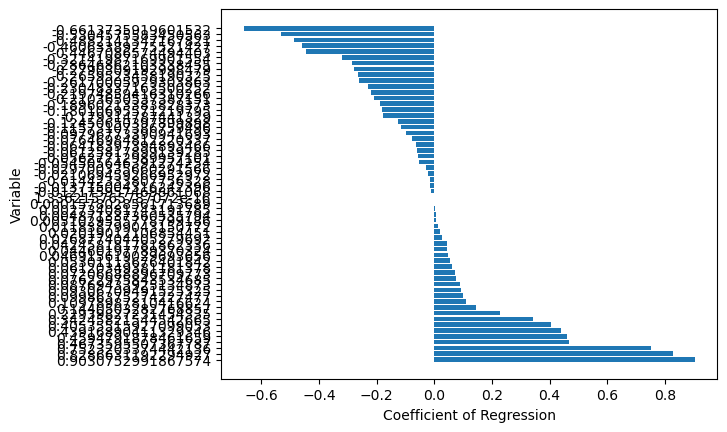

In [198]:
df_reg_coef.sort_values("Coef", ascending=False, inplace = True)
coordinates = range(len(df_reg_coef))
plt.barh(y=coordinates, width = df_reg_coef["Coef"])
plt.yticks(coordinates,df_reg_coef["Coef"])
plt.xlabel("Coefficient of Regression")
plt.ylabel("Variable")
plt.show()

# STEP 4. 모델 생성 : Linear Regression(sklearn 사용)

In [180]:
df_y = df_tot["Price"]
df_x = df_tot.drop("Price", axis=1)

In [181]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("test data Y size : {}".format(df_train_y.shape))
print("train data X size : {}".format(df_test_x.shape))
print("test data Ysize : {}".format(df_test_y.shape))

train data X size : (4332, 58)
test data Y size : (4332,)
train data X size : (1857, 58)
test data Ysize : (1857,)


In [182]:
lr_model = LinearRegression()
lr_model.fit(df_train_x, df_train_y)

LinearRegression()

In [183]:
df_x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,11.184421,26.60,998.0,58.16,5.0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,10.621327,19.67,1582.0,126.20,5.0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,10.736397,18.20,1199.0,88.70,5.0,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,11.373663,20.77,1248.0,88.76,7.0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,10.613246,15.20,1968.0,140.80,5.0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
print(lr_model.coef_)

[ 6.04170147e-02 -5.62771299e-02 -1.44233381e-02  1.57802856e-04
  4.87133736e-03  5.30111368e-02 -6.04170147e-02  2.68823758e-02
  1.44055300e-01  2.01950924e-02  9.30720663e-02 -5.45006750e-02
  1.09794849e-01 -6.41790026e-02 -1.37100329e-02 -2.19743623e-01
 -1.21709861e-02 -2.96953643e-02 -2.65941409e-01  2.74501878e-03
  8.28674056e-01 -2.86457684e-01 -2.79019982e-01  6.12308364e-02
 -6.12308364e-02  4.69292903e-02  7.20805603e-02 -2.10557880e-02
 -9.79540626e-02  1.18407521e-02  4.39170857e-01  4.05357112e-01
  8.76962923e-02 -4.88212182e-01 -5.30455605e-01 -4.60631940e-01
  9.71445147e-17 -2.61698106e-01 -1.24504551e-01 -1.79312834e-01
 -4.46706704e-01  4.67361504e-01  7.62317115e-02  7.52322290e-01
 -3.21417919e-01 -1.80105003e-01  4.59481141e-01  9.03077252e-01
  9.98657058e-02 -2.10363101e-01  3.42460168e-01 -2.30481419e-01
 -7.64678951e-02  4.24601348e-02 -6.61371639e-01  4.46039309e-02
 -1.89600181e-01  2.29400225e-01]


In [185]:
print(lr_model.intercept_)

-111.90045521057917


In [186]:
df_train_x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Car_age', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_FourthAbove', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Bra

In [187]:
print("Score on traning set : {:.3f}".format(lr_model.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(lr_model.score(df_test_x, df_test_y)))

Score on traning set : 0.910
Score on test set : 0.870


In [188]:
# 예측값 생성
train_pred = lr_model.predict(df_train_x)
test_pred = lr_model.predict(df_test_x)

In [189]:
print("train data의 결정계수 : ", r2_score(df_train_y, train_pred))
print("test data의 결정계수 : ", r2_score(df_test_y, test_pred))

train data의 결정계수 :  0.9099578937758909
test data의 결정계수 :  0.8700976971534233


In [190]:
print("Prediction for test set : {}".format(test_pred))

Prediction for test set : [ 8.19009011  8.61818776 10.45716115 ...  8.70730634  8.12404456
  8.8635051 ]


# STEP 5. 결론도출(sklearn 사용)

In [199]:
# 설명변수 중요도(표준화 적용 이전)-> 표준화 회귀계수 산출해야 함
lr_reg_coef = pd.DataFrame({'Coef': lr_model.coef_}, index=df_train_x.columns)

df_reg_coef.sort_values('Coef', ascending=False, inplace=True)
df_reg_coef.round(3)

,Variable,Coef
47,Brand_Mini,0.903
20,Fuel_Type_Electric,0.829
43,Brand_Land,0.752
41,Brand_Jaguar,0.467
46,Brand_Benz,0.459
30,Brand_Audi,0.439
31,Brand_BMW,0.405
50,Brand_Porsche,0.342
57,Brand_Volvo,0.229
8,Location_Bangalore,0.144


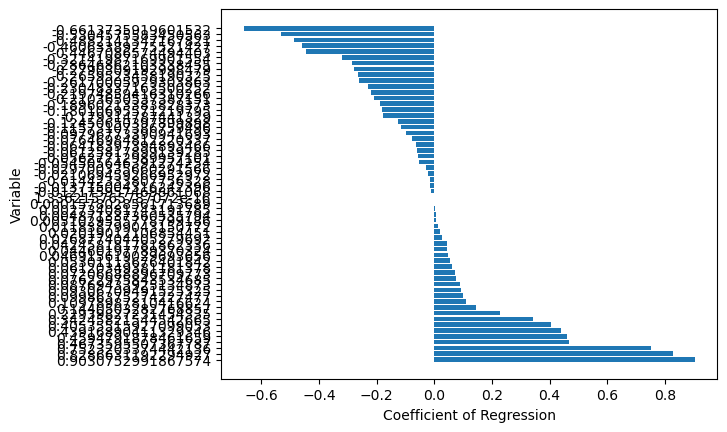

In [200]:
df_reg_coef.sort_values("Coef", ascending=False, inplace = True)
coordinates = range(len(df_reg_coef))
plt.barh(y=coordinates, width = df_reg_coef["Coef"])
plt.yticks(coordinates,df_reg_coef["Coef"])
plt.xlabel("Coefficient of Regression")
plt.ylabel("Variable")
plt.show()

# STEP 4. 모델 생성 : Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

In [101]:
dt_model = DecisionTreeRegressor()
dt_model.fit(train_x,train_y)


DecisionTreeRegressor()

In [102]:
train_pred = dt_model.predict(train_x)
dt_model.score(train_x,train_y)

0.9999887940273128

In [103]:
test_pred = dt_model.predict(test_x)
dt_model.score(test_x,test_y)

0.8233142111388956

In [104]:
param_grid = {
    "max_depth": range(2, 10),
    "min_samples_split": range(2, 40, 2),
    "min_samples_leaf": range(2, 20, 2)
}

In [105]:
grid_dt = GridSearchCV(dt_model, param_grid, cv =3 , n_jobs = -1)
grid_dt.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [106]:
print("best model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_dt.score(test_x,test_y).round(3)))

best model: 
DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=16)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 16}

best score: 
0.859

best set score: 
0.84


In [107]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 6,min_samples_split = 16,max_depth = 9, random_state=1234,)
tree_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=16,
                      random_state=1234)

In [108]:
print("Score on training set: {:.3f}".format(tree_final.score(train_x, train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(test_x, test_y)))

Score on training set: 0.919
Score on test set: 0.839


In [109]:
df_importance = pd.DataFrame()
df_importance["Feature"] = train_x.columns
df_importance["importance"] = tree_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
4,Power,0.651
0,Year,0.220
3,Engine,0.042
6,Car_age,0.033
2,Mileage,0.016
38,Brand_Honda,0.005
1,Kilometers_Driven,0.005
15,Location_Kolkata,0.004
44,Brand_Mahindra,0.004
23,Transmission_Automatic,0.002


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 4832

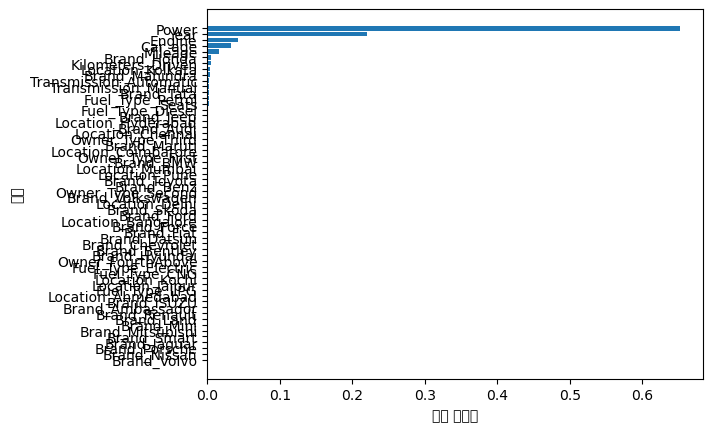

In [110]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf_model = RandomForestRegressor()
rf_model.fit (train_x, train_y)

RandomForestRegressor()

In [113]:
train_pred = rf_model.predict(train_x)
rf_model.score(train_x, train_y)

0.9883332962836416

In [114]:
test_pred = rf_model.predict(test_x)
rf_model.score(test_x, test_y)

0.8890492129873229

* GridSearchCV를 이용한 최적 parameter/model 찾기

In [117]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [118]:
grid_rf = GridSearchCV(rf_model, param_grid, cv=3, n_jobs = -1)
grid_rf.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [120]:
print("best model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_rf.score(test_x,test_y).round(3)))

best model: 
RandomForestRegressor(max_depth=9, min_samples_leaf=2)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score: 
0.895

best set score: 
0.876


* 최종모델

In [124]:
rf_final = RandomForestRegressor(min_samples_leaf = 2, min_samples_split = 2,
                                max_depth = 9, random_state = 1234)
rf_final.fit(train_x, train_y)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, random_state=1234)

In [125]:
print("Score on training set : {:.3f}".format(rf_final.score(train_x, train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(test_x, test_y)))

Score on training set : 0.947
Score on test set : 0.877


In [131]:
df_importance = pd.DataFrame()
df_importance["Feature"] = train_x.columns
df_importance["importance"] = rf_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
4,Power,0.631
0,Year,0.127
6,Car_age,0.121
3,Engine,0.045
2,Mileage,0.012
1,Kilometers_Driven,0.011
44,Brand_Mahindra,0.005
43,Brand_Land,0.004
38,Brand_Honda,0.004
46,Brand_Benz,0.003


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 4832

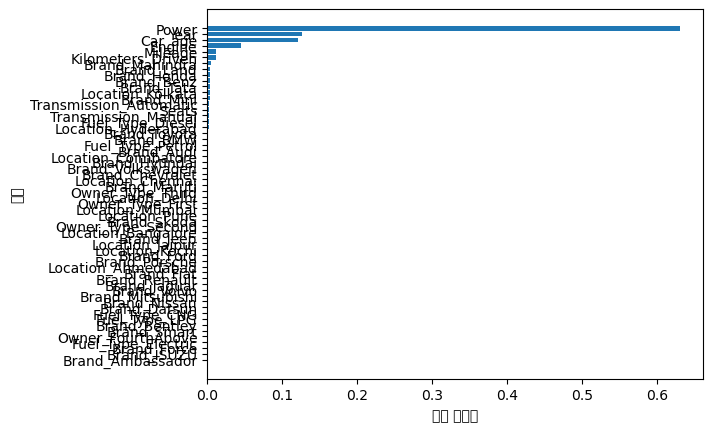

In [132]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그레디언트

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
gb_model = GradientBoostingRegressor()
gb_model.fit (train_x, train_y)

GradientBoostingRegressor()

In [135]:
train_pred = gb_model.predict(train_x)
gb_model.score(train_x, train_y)

0.9343235320364556

In [136]:
test_pred = gb_model.predict(test_x)
gb_model.score(test_x, test_y)

0.8826833869109816

In [137]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [138]:
grid_gb = GridSearchCV(gb_model, param_grid, cv=3, n_jobs = -1)
grid_gb.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [139]:
print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_gb.score(test_x,test_y).round(3)))

best model: 
GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=34)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 34}

best score: 
0.92

best set score: 
0.896


In [144]:
gb_final = GradientBoostingRegressor(min_samples_leaf = 6, min_samples_split = 34,
                                max_depth = 9, random_state = 1234)
gb_final.fit(train_x, train_y)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=34,
                          random_state=1234)

In [145]:
print("Score on training set : {:.3f}".format(gb_final.score(train_x, train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(test_x, test_y)))

Score on training set : 0.979
Score on test set : 0.896


In [150]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = train_x.columns
df_importance["importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
4,Power,0.631
0,Year,0.127
6,Car_age,0.121
3,Engine,0.045
2,Mileage,0.012
1,Kilometers_Driven,0.011
44,Brand_Mahindra,0.005
43,Brand_Land,0.004
38,Brand_Honda,0.004
46,Brand_Benz,0.003


/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_

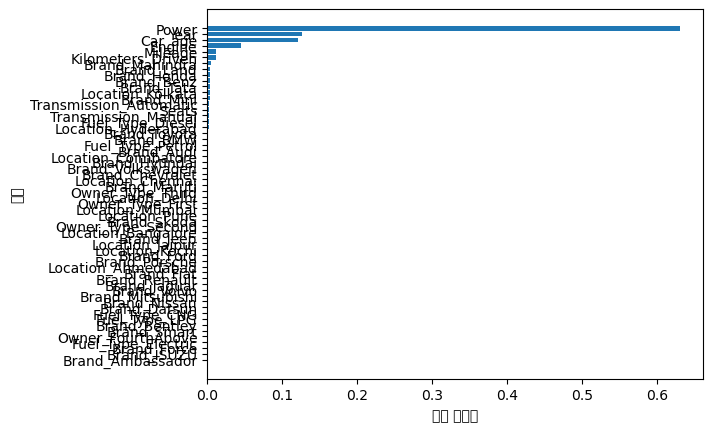

In [151]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

# STEP 6. 예측 모델 평가

In [152]:
# 평가함수 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
# from statsmodels.tools.eval_measures import rmse

In [153]:
# RMSE : root mean squared error 함수
def root_mean_squared_error (df_test_y, lr_y_pred):
    return np.sqrt(mean_squared_error(df_test_y, lr_y_pred))

In [154]:
df_tot.shape

(6189, 59)

In [155]:
# 목표변수, 설명변수 데이터 지정
df_tot_y = df_tot["Price"]
df_tot_x = df_tot.drop("Price", axis = 1, inplace = False)

In [158]:
# train_test_split( X : 설명변수 데이터, Y : 목표변수 데이터)
# test_size = test 데이버 비율, random_state : random seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_tot_x, df_tot_y,
                                                                test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_x.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (4332, 58)
train data Y size : (4332, 58)
test data X size : (1857, 58)
test data Y size : (1857, 58)


예측모델 생성

In [159]:
# 회귀 모델
lr_model = LinearRegression()
lr_model.fit(df_train_x, df_train_y)

LinearRegression()

In [160]:
LinearRegression()

LinearRegression()

In [173]:
# Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 16,
                                max_depth = 9, random_state = 1234)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(min_samples_leaf = 6, min_samples_split = 8,
                                max_depth = 9, random_state = 1234)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(min_samples_leaf = 6, min_samples_split = 8,
                                max_depth = 9, random_state = 1234)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=8,
                          random_state=1234)

예측 및 평가 

In [174]:
# 모델 리스트, 그래프를 그리기 위한 생성 목적 
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# 평가 리스트 초기화 
mse, rmse, mae, mape = [], [], [], []

In [175]:

# 1) Regrssion 

# 예측
lr_y_pred = lr_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [176]:
# 2) Decision Tree

# 예측
df_y_pred = dt_model.predict(df_test_x)

# 평가 
mse.append(mean_squared_error(df_test_y, df_y_pred))
rmse.append(root_mean_squared_error(df_test_y, df_y_pred))
mae.append(mean_absolute_error(df_test_y, df_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, df_y_pred))

In [177]:
# 3) Random Forest

# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [178]:
# 4) Gradient Boosting

# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

시각화 : 평가 

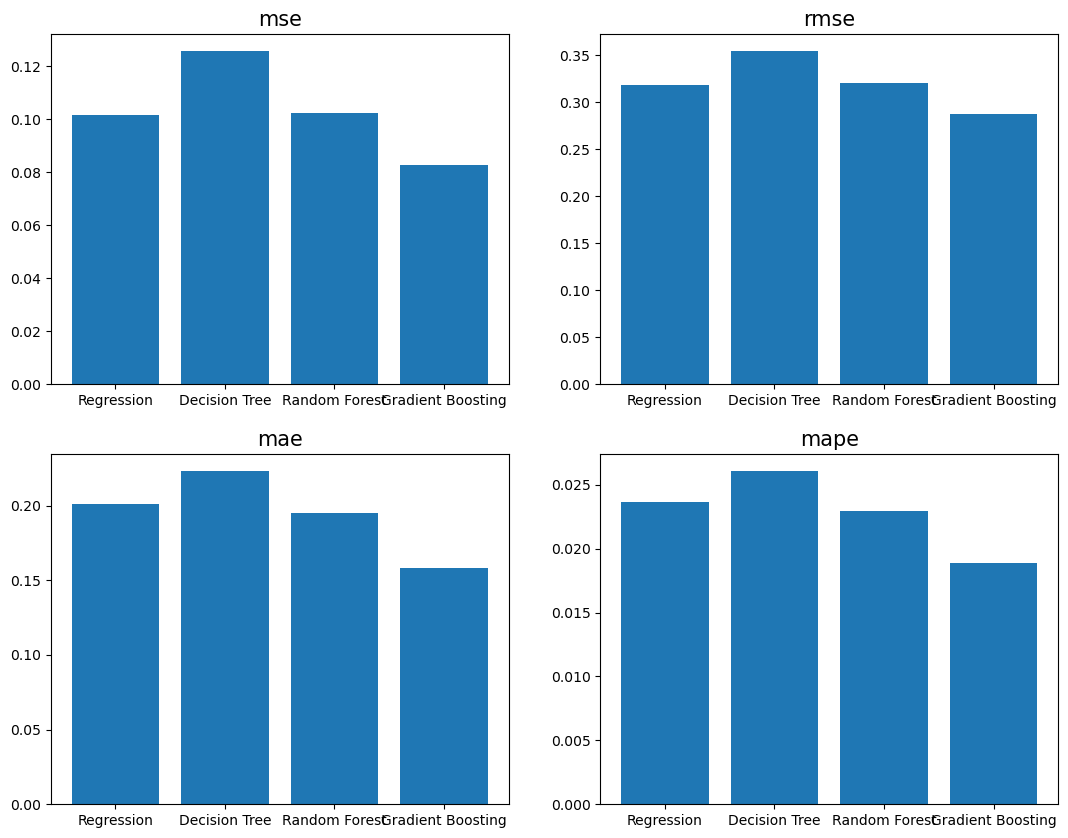

In [179]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)